https://rfriend.tistory.com/600

In [ ]:
import zipfile

zf = zipfile.ZipFile('/content/drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/aclImdb/aclImdb.zip')
zf.extractall()
zf.close()

In [ ]:
import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
texts[0]

'I saw this movie way back at the first theatrical release, in a justifiably empty theater. Believe it or not, after decades of watching movies, this one still sticks clearly in my mind as the worst movie of all time; or at least the worst that I would allow myself to watch.<br /><br />The acting is far beneath the standard set by any random group of drunken high-school students yanked off the street and forced to learn their lines in 5 minutes or less.<br /><br />After the first shock of disbelief, we laughed for a while as each scene hit new lows. But after a while, even that dubious pleasure wore off and it just got to be really sad.'

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [ ]:
word_index.items()

dict_items([('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10), ('this', 11), ('that', 12), ('was', 13), ('as', 14), ('for', 15), ('with', 16), ('movie', 17), ('but', 18), ('film', 19), ('on', 20), ('not', 21), ('you', 22), ('are', 23), ('his', 24), ('have', 25), ('he', 26), ('be', 27), ('one', 28), ('all', 29), ('at', 30), ('by', 31), ('an', 32), ('they', 33), ('who', 34), ('so', 35), ('from', 36), ('like', 37), ('her', 38), ('or', 39), ('just', 40), ('about', 41), ("it's", 42), ('out', 43), ('has', 44), ('if', 45), ('some', 46), ('there', 47), ('what', 48), ('good', 49), ('more', 50), ('when', 51), ('very', 52), ('up', 53), ('no', 54), ('time', 55), ('she', 56), ('even', 57), ('my', 58), ('would', 59), ('which', 60), ('only', 61), ('story', 62), ('really', 63), ('see', 64), ('their', 65), ('had', 66), ('can', 67), ('were', 68), ('me', 69), ('well', 70), ('than', 71), ('we', 72), ('much', 73), ('been', 74), ('bad', 75), ('get'

In [ ]:
len(sequences)

25000

In [ ]:
data.shape

(25000, 100)

### GloVe 단어 임베딩 내려받기

https://nlp.stanford.edu/projects/glove 에서 2014년 영문 위키피디아를 사용해 사전에 계산된 임베딩을 내려받습니다. 이 파일의 이름은 glove.6B.zip이고 압축 파일 크기는 823MB입니다. 400,000만개의 단어(또는 단어가 아닌 토큰)에 대한 100차원의 임베딩 벡터를 포함하고 있습니다. datasets 폴더 아래에 파일 압축을 해제합니다.


In [ ]:
import os
import numpy as np 

globe_dir='/content/drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/NLP/datasets/'

embeddings_index = {}
f = open(os.path.join(globe_dir,'glove.6B.100d.txt'), encoding='utf=8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print(f'{len(embeddings_index)}개의 단어 벡터')

400000개의 단어 벡터


In [ ]:
len(embeddings_index['a'])

100

In [ ]:
len(word_index)

88582

In [ ]:
word_index.values()

dict_values([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))


200개의 샘플을 학습한 후 영화 리뷰를 분류

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector


In [ ]:
embedding_matrix.shape

(10000, 100)

In [ ]:
embedding_matrix[1]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델에 GloVe 임베딩 로드하기
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False #사전 훈련된것은 바꾸면 안됨.

In [ ]:
model.compile(optimizer='rmsprop',
              loss= 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size=32,
                    validation_data=(x_val,y_val))
model.save_weights('/content/drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/pre_trained_glove.h5')

Epoch 1/10
7/7 [==============================] - 1s 113ms/step - loss: 1.7588 - acc: 0.5450 - val_loss: 0.7347 - val_acc: 0.5039
Epoch 2/10
7/7 [==============================] - 1s 87ms/step - loss: 0.8240 - acc: 0.6150 - val_loss: 0.9939 - val_acc: 0.4962
Epoch 3/10
7/7 [==============================] - 1s 87ms/step - loss: 0.3889 - acc: 0.8400 - val_loss: 0.6935 - val_acc: 0.5660
Epoch 4/10
7/7 [==============================] - 1s 87ms/step - loss: 0.4420 - acc: 0.7800 - val_loss: 0.6943 - val_acc: 0.5566
Epoch 5/10
7/7 [==============================] - 1s 84ms/step - loss: 0.1646 - acc: 0.9950 - val_loss: 0.7168 - val_acc: 0.5681
Epoch 6/10
7/7 [==============================] - 1s 86ms/step - loss: 0.1537 - acc: 0.9700 - val_loss: 1.6095 - val_acc: 0.4984
Epoch 7/10
7/7 [==============================] - 1s 83ms/step - loss: 0.1444 - acc: 0.9400 - val_loss: 0.7335 - val_acc: 0.5802
Epoch 8/10
7/7 [==============================] - 1s 86ms/step - loss: 0.1497 - acc: 0.9350 - va

In [ ]:
# 모델 load
model.load_weights('/content/drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/pre_trained_glove.h5')

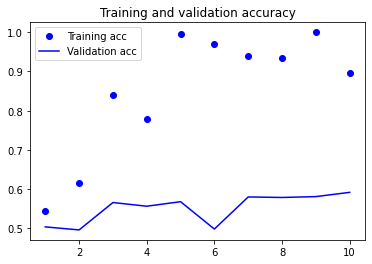

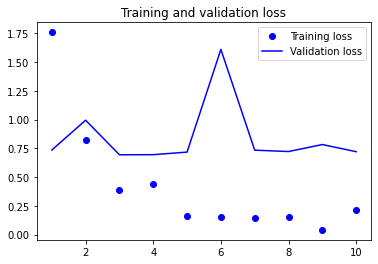

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


이 모델은 검증 정확도가 50% 후분이며, 과대적합이 빠르게 시작됩니다. 훈련 샘플 수가 작기 때문입니다.


[과제] 사전 훈련된 임베딩을 사용하지 않고 상기 작업을 수행하여 비교해 보세요.(샘플 200개)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val,y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                320032    
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 115ms/step - loss: 0.6976 - acc: 0.5000 - val_loss: 0.6923 - val_acc: 0.5072
Epoch 2/10
7/7 [==============================

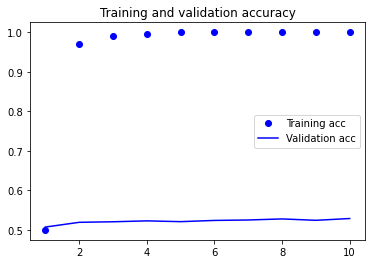

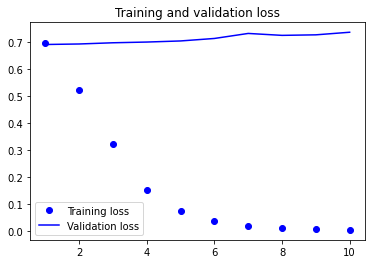

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[과제] 훈련 샘플 수를 2000개로 늘려서 모델링 및 시각화 수행하여 상기 경우와 비교해 보세요.



In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 2000  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector


In [ ]:
# 모델에 GloVe 임베딩 로드하기
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False #사전 훈련된것은 바꾸면 안됨.

In [ ]:
model.compile(optimizer='rmsprop',
              loss= 'binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size=32,
                    validation_data=(x_val,y_val))
model.save_weights('/content/drive/MyDrive/MKS/과정9_딥러닝알고리즘구현/pre_trained_glove.h6')

Epoch 1/10
63/63 [==============================] - 1s 14ms/step - loss: 0.6992 - acc: 0.5010 - val_loss: 0.6939 - val_acc: 0.5014
Epoch 2/10
63/63 [==============================] - 1s 12ms/step - loss: 0.7019 - acc: 0.5170 - val_loss: 0.6964 - val_acc: 0.5023
Epoch 3/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6718 - acc: 0.5610 - val_loss: 0.7004 - val_acc: 0.4989
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6378 - acc: 0.6150 - val_loss: 0.7458 - val_acc: 0.5003
Epoch 5/10
63/63 [==============================] - 1s 12ms/step - loss: 0.5875 - acc: 0.6825 - val_loss: 0.7735 - val_acc: 0.5030
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 0.5086 - acc: 0.7500 - val_loss: 0.7789 - val_acc: 0.4928
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 0.4371 - acc: 0.8065 - val_loss: 1.0401 - val_acc: 0.4989
Epoch 8/10
63/63 [==============================] - 1s 12ms/step - loss: 0.3600 - a

단어 임베딩 : Word2Vec 

https://doc.mindscale.kr/km/unstructured/11.html


[과제] 'https://www.gutenberg.org/files/2591/2591-0.txt' The Project Gutenberg 사이트 텍스트를 전처리 후 다음을 수행하세요.
- 사전 훈련된 Word2Vec을 gensim을 이용하여 임포트 후 cbow, skip-gram 방식으로 모델링하여 유사도 측정
  - wv.similarity('king','prince')
  - wv.most_similar('king')
  - most_similar(positive=['man','princess'], negative=['woman'])
- 옵션 사항
  - size(워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원) : 100
  - window(컨텍스트 윈도우 크기) : 3
  - min_count(단어 최소 빈도 수 제한-빈도가 적은 단어들은 학습하지 않는다.) : 3
  - workers(학습을 위한 프로세스 수) : 4
  - sg = 0은 CBOW, 1은 Skip-gram.


In [ ]:
import requests
import re

In [ ]:
res = requests.get('https://www.gutenberg.org/files/2591/2591-0.txt')

In [ ]:
grimm = res.text[2801:530661]
grimm = re.sub(r'[^a-zA-Z\. ]', ' ', grimm)
sentences = grimm.split('. ')  # 문장 단위로 자름

data = [s.split() for s in sentences]

In [ ]:
data[0]   # 첫 번째 문장을 단어 단위로 자른 결과를 확인하자

['SECOND',
 'STORY',
 'THE',
 'SALAD',
 'THE',
 'STORY',
 'OF',
 'THE',
 'YOUTH',
 'WHO',
 'WENT',
 'FORTH',
 'TO',
 'LEARN',
 'WHAT',
 'FEAR',
 'WAS',
 'KING',
 'GRISLY',
 'BEARD',
 'IRON',
 'HANS',
 'CAT',
 'SKIN',
 'SNOW',
 'WHITE',
 'AND',
 'ROSE',
 'RED',
 'THE',
 'BROTHERS',
 'GRIMM',
 'FAIRY',
 'TALES',
 'THE',
 'GOLDEN',
 'BIRD',
 'A',
 'certain',
 'king',
 'had',
 'a',
 'beautiful',
 'garden',
 'and',
 'in',
 'the',
 'garden',
 'stood',
 'a',
 'tree',
 'which',
 'bore',
 'golden',
 'apples']

In [ ]:
!pip install -y gensim


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
model = Word2Vec(data,         # 리스트 형태의 데이터
                 sg=1,         # 0: CBOW, 1: Skip-gram
                 size=100,     # 벡터 크기
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)    # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

In [ ]:
model.save('word2vec.model')

In [ ]:
model = Word2Vec.load('word2vec.model')
print(model)

Word2Vec(vocab=2446, size=100, alpha=0.025)


In [ ]:
model.wv['princess']

array([ 3.26000117e-02,  1.80365205e-01, -1.95186511e-01,  3.48008066e-01,
       -1.41722560e-01,  2.74331480e-01, -7.61316568e-02, -3.27722281e-02,
       -2.27123559e-01, -1.60579935e-01, -8.71316195e-02, -5.66451922e-02,
        3.46343607e-01, -7.01234415e-02,  4.85762060e-02,  4.74080481e-02,
        2.28427514e-01,  3.50499451e-01, -1.10161223e-01, -1.86888546e-01,
       -3.23729691e-05,  9.20762271e-02,  6.66993782e-02,  9.91705284e-02,
       -9.57350284e-02,  1.03517741e-01, -4.18607630e-02,  9.37708393e-02,
       -1.66065529e-01,  1.18079670e-02,  1.95951201e-02,  1.97861388e-01,
        4.13909182e-02, -5.32475207e-03, -1.27312243e-01,  7.07615167e-02,
        2.41955761e-02, -1.78641871e-01,  1.32377923e-01, -4.04680483e-02,
       -2.66575608e-02, -3.88560863e-03, -5.45790717e-02,  9.39182192e-03,
        1.51973635e-01, -6.96941763e-02, -6.20247461e-02,  2.14088783e-02,
        3.24976370e-02, -1.86901875e-02,  6.13036891e-03, -2.53792226e-01,
       -9.79294851e-02,  

In [ ]:
model.wv.similarity('king','prince')

0.8134261

In [ ]:
model.wv.most_similar('king')

[('daughter', 0.9379431009292603),
 ('son', 0.9323351979255676),
 ('woman', 0.9136278629302979),
 ('man', 0.9060941934585571),
 ('old', 0.8667183518409729),
 ('queen', 0.8467404842376709),
 ('But', 0.8438525199890137),
 ('boy', 0.8430429697036743),
 ('fox', 0.840035080909729),
 ('miller', 0.8340318202972412)]

In [ ]:
model.most_similar(positive=['man','princess'], negative=['woman'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers','footers','quotes'))
documents = dataset.data
print(len(documents))
documents[3]


11314


'Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT\'s last product in this area (a) was priced over\n$1000, as I suspect \'clipper\' phones will be; (b) came to the customer \nwith the key automatically preregistered with government authorities. Thus,\naside from attempting to further legitimize and solidify the fed\'s posture,\nClipper seems to be "more of the same", rather than a new direction.\n   Yes, technology will eventually drive the cost down and thereby promote\nmore widespread use- but at present, the man on the street is not going\nto purchase a $1000 crypto telephone, especially when the guy on the other\nend probably doesn\'t have one anyway.  Am I missing something?\n   The real question is what the gov will do in a year or two when air-\ntight voice privacy on a phone line is as close as your nearest pc.  That\nhas got to a problematic scenario for them, even if the extent of usage\nnever surpasses the \'underground\' stature

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(d):
  pattern = r'[^a-zA-Z\s]'
  d = re.sub(pattern, '', d)
  return d

def clean_stopwords(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def tokenize(d):
  return word_tokenize(d)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
news_df = pd.DataFrame({'article':documents})
len(news_df)

11314

In [ ]:
news_df.replace("",float('Nan'), inplace=True)
news_df.dropna(inplace=True)
len(news_df)

11096

In [ ]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well im not sure about the story nad it did se...
1        \n\n\n\n\n\n\nYeah do you expect people to rea...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well I will have to change the scoring on my p...
                               ...                        
11309    Danny Rubenstein an Israeli journalist will be...
11310                                                   \n
11311    \nI agree  Home runs off Clemens are always me...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          \nNo arg...
Name: article, Length: 11096, dtype: object

In [ ]:
news_df['article'] = news_df['article'].apply(clean_stopwords)
news_df['article']

0        well sure story seem biased what disagree stat...
1        yeah expect people read actually accept hard a...
2        although realize principle strongest points wo...
3        notwithstanding legitimate fuss proposal much ...
4        well change scoring playoff pool unfortunately...
                               ...                        
11309    danny rubenstein israeli journalist speaking t...
11310                                                     
11311    agree home runs clemens always memorable kinda...
11312    used deskjet orange micros grappler system upd...
11313    argument murphy scared hell came last year han...
Name: article, Length: 11096, dtype: object

In [ ]:
tokenized_news= news_df['article'].apply(tokenize)
tokenized_news = tokenized_news.to_list()
tokenized_news[168]

['animal', 'rights', 'people', 'know', 'bike', 'riding', 'dogscats', 'racoons']

In [ ]:
len(tokenized_news)

11096

In [ ]:
import numpy as np
drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))

10945


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [ ]:
# CBOW

from gensim.models import Word2Vec
model = Word2Vec(sentences = news_texts,
                 window = 4,
                 size = 100,
                 min_count=5,
                 workers=4,
                 sg=0)

In [ ]:
model.wv.similarity('man','woman')

KeyError: ignored

In [ ]:
model.most_similar(positive=['soldiers'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('turkey', 0.9849419593811035),
 ('turks', 0.9845236539840698),
 ('azerbaijani', 0.9844380021095276),
 ('muslim', 0.9840076565742493),
 ('land', 0.9826202392578125),
 ('armenians', 0.9784226417541504),
 ('killed', 0.9754636287689209),
 ('henrik', 0.9749361276626587),
 ('genocide', 0.9727681875228882),
 ('villages', 0.9713420867919922)]

In [ ]:
model.wv.most_similar(positive=['tiger','cats'], negative=['wolves'])

[('glock', 0.9944834113121033),
 ('bored', 0.9942288994789124),
 ('sour', 0.9941658973693848),
 ('nuts', 0.9935293197631836),
 ('beasts', 0.9934656620025635),
 ('fare', 0.9931761026382446),
 ('breath', 0.9930627942085266),
 ('gainey', 0.9924904704093933),
 ('jump', 0.9923772811889648),
 ('foolish', 0.99232017993927)]

[과제] skipgram으로 상기 과제를 수행하세요.

In [ ]:
# skip-gram
from gensim.models import Word2Vec

model = Word2Vec(sentences=news_texts, 
                 window=4, # 고려할 앞 뒤 폭
                 size=100, # 벡터 크기
                 min_count=5, # 사용할 단어의 최소 빈도 (5회 이하 단어 무시)
                 workers=4, # 동시에 처리할 작업의 수 
                 sg=1) # 0 : cbow, 1 : skip-gram

model.save('word2vec.model2') # 저장하기
model = Word2Vec.load('word2vec.model2') # 불러오기

In [ ]:
model.wv.similarity('movie', 'film')

0.9501343

In [ ]:
model.wv.most_similar(positive=['woman'])

[('sister', 0.9307565689086914),
 ('husband', 0.9281118512153625),
 ('marina', 0.923896312713623),
 ('igor', 0.9193050861358643),
 ('daughters', 0.9184841513633728),
 ('naked', 0.916270911693573),
 ('girl', 0.9150261282920837),
 ('corpse', 0.912635326385498),
 ('lyuda', 0.9120573401451111),
 ('neighbor', 0.9112900495529175)]

In [ ]:
model.wv.most_similar(positive=['men', 'princess'], negative='soldier')